**Load the dataset**

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv("survey_results_public.csv", low_memory=False)
print(df.shape)
df.head()


(65437, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Keep only the columns you need**

In [3]:
use_cols = [
    "Country", "Employment", "RemoteWork",
    "YearsCodePro", "EdLevel", "DevType", "OrgSize", "Industry",
    "ConvertedCompYearly"
]
use_cols = [c for c in use_cols if c in df.columns]
df = df[use_cols].copy()
print(df.shape)


(65437, 9)


**Filter to the active workforce**

In [4]:
df["Employment_clean"] = df["Employment"].astype(str).str.lower()

df = df[df["Employment_clean"].str.contains(
    "employed|independent|freelance|self-employed",
    na=False
)].copy()

print(df.shape)


(59105, 10)


## > Here you should make the cleaning for all those columns. missings are not accepted.

**Define the brain drain proxy**
## > Brain Drain is not remote work, you should make a condition to define if that case is brain drain or not.
*ex. if it has more then 10yrs of experience and from a low income country and work remotly then its a brain drain...ask chatgbt*

In [5]:
df["brain_drain"] = df["RemoteWork"].map({
    "Remote": 1,
    "Hybrid (some remote, some in-person)": 0,
    "In-person": 0
})

print(df["brain_drain"].value_counts(dropna=False, normalize=True))
print(df["RemoteWork"].value_counts(dropna=False))


brain_drain
0.0    0.574824
1.0    0.352441
NaN    0.072735
Name: proportion, dtype: float64
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
NaN                                      4299
Name: count, dtype: int64


**Clean numeric fields**

In [6]:
df["YearsCodePro_num"] = pd.to_numeric(
    df["YearsCodePro"].replace({"Less than 1 year": 0, "More than 50 years": 51}),
    errors="coerce"
)

df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")


**Exploratory Data Analysis**

In [7]:
print("Rows:", len(df))
print("Duplicate rows:", df.duplicated().sum())

missing = (df.isna().mean().sort_values(ascending=False) * 100).head(15)
print(missing)


Rows: 59105
Duplicate rows: 5939
ConvertedCompYearly    60.351916
Industry               51.175027
OrgSize                19.683614
YearsCodePro           15.738093
YearsCodePro_num       15.738093
Country                 9.726757
DevType                 8.552576
RemoteWork              7.273496
brain_drain             7.273496
EdLevel                 6.779460
Employment              0.000000
Employment_clean        0.000000
dtype: float64


**Key distributions**

In [8]:
print(df["RemoteWork"].value_counts(dropna=False))

country_counts = df["Country"].value_counts()
print(country_counts.head(20))
print("Countries with n<50:", (country_counts < 50).sum())


RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
NaN                                      4299
Name: count, dtype: int64
Country
United States of America                                10152
Germany                                                  4419
India                                                    3560
United Kingdom of Great Britain and Northern Ireland     2902
Ukraine                                                  2607
Canada                                                   1921
France                                                   1889
Poland                                                   1427
Netherlands                                              1311
Brazil                                                   1303
Italy                                                    1202
Australia                                                1113
Spain                      

**Validate label mapping**

In [9]:
print(df.groupby("RemoteWork")["brain_drain"].mean())


RemoteWork
Hybrid (some remote, some in-person)    0.0
In-person                               0.0
Remote                                  1.0
Name: brain_drain, dtype: float64


**Numeric EDA**

## > Here: try to plot the results with the numeric EDA, dont make the numeric EDA and then the plots. pls make a summary at the end

In [10]:
print(df["YearsCodePro_num"].describe(percentiles=[.1,.25,.5,.75,.9,.95,.99]))
print("YearsCodePro missing:", df["YearsCodePro_num"].isna().mean())

print(df["ConvertedCompYearly"].describe(percentiles=[.1,.25,.5,.75,.9,.95,.99]))
print("Salary missing:", df["ConvertedCompYearly"].isna().mean())


count    49803.000000
mean        10.403891
std          9.036483
min          0.000000
10%          2.000000
25%          4.000000
50%          8.000000
75%         15.000000
90%         24.000000
95%         29.000000
99%         40.000000
max         51.000000
Name: YearsCodePro_num, dtype: float64
YearsCodePro missing: 0.15738093223923527
count    2.343400e+04
mean     8.615699e+04
std      1.867608e+05
min      1.000000e+00
10%      9.571000e+03
25%      3.271200e+04
50%      6.500000e+04
75%      1.079858e+05
90%      1.670000e+05
95%      2.100000e+05
99%      3.938585e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64
Salary missing: 0.6035191608154978


In [11]:
cap = df["ConvertedCompYearly"].quantile(0.99)
df["Comp_plot"] = df["ConvertedCompYearly"].clip(upper=cap)


**Core Analysis & Insights**

In [12]:
country_stats = (df.groupby("Country")["brain_drain"]
                 .agg(rate="mean", n="count")
                 .reset_index()
                 .query("n >= 50")
                 .sort_values("rate", ascending=False))

country_stats.head(20)


,Country,rate,n
167,Ukraine,0.741866,2336
58,Georgia,0.738636,88
174,"Venezuela, Bolivarian Republic of...",0.677966,59
36,Colombia,0.675676,185
38,Costa Rica,0.666667,51
6,Argentina,0.644518,301
34,Chile,0.637168,113
23,Brazil,0.587171,1216
128,Poland,0.546708,1306
135,Russian Federation,0.532213,714


**Brain drain by seniority**

In [13]:
df["seniority"] = pd.cut(
    df["YearsCodePro_num"],
    bins=[-1, 1, 3, 5, 10, 20, 100],
    labels=["<1", "1-3", "3-5", "5-10", "10-20", "20+"]
)

(df.groupby("seniority")["brain_drain"]
   .agg(rate="mean", n="count")
   .reset_index()
   .sort_values("rate", ascending=False))


C:\Users\DELL\AppData\Local\Temp\ipykernel_9576\3873802589.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby("seniority")["brain_drain"]


,seniority,rate,n
4,10-20,0.463300,11267
5,20+,0.457842,6535
3,5-10,0.410409,12239
2,3-5,0.361538,6370
1,1-3,0.289505,7537
0,<1,0.243215,3869


**Brain drain by education level**

In [14]:
(df.groupby("EdLevel")["brain_drain"]
   .agg(rate="mean", n="count")
   .reset_index()
   .sort_values("rate", ascending=False)
   .head(15))


,EdLevel,rate,n
3,Primary/elementary school,0.460938,384
6,Some college/university study without earning ...,0.432080,6066
0,"Associate degree (A.A., A.S., etc.)",0.415216,1551
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0.390324,22220
5,"Secondary school (e.g. American high school, G...",0.378431,3060
2,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0.371299,14592
7,Something else,0.333895,593
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",0.310015,2716


**Brain drain by role**

In [15]:
tmp = df[["DevType", "brain_drain"]].dropna(subset=["DevType"]).copy()
tmp["DevType"] = tmp["DevType"].str.split(";")
tmp = tmp.explode("DevType")

devtype_stats = (tmp.groupby("DevType")["brain_drain"]
                 .agg(rate="mean", n="count")
                 .reset_index()
                 .query("n >= 200")
                 .sort_values("rate", ascending=False))

devtype_stats.head(20)


,DevType,rate,n
1,Blockchain,0.712871,202
18,"Developer, game or graphics",0.493256,519
12,"Developer, QA or test",0.466395,491
2,Cloud infrastructure engineer,0.464580,607
13,"Developer, back-end",0.451296,9260
16,"Developer, front-end",0.449883,2983
19,"Developer, mobile",0.440678,1829
21,"Engineer, site reliability",0.430034,293
30,Security professional,0.411003,309
17,"Developer, full-stack",0.408001,17022


**Salary uplift: Remote vs Not remote**

In [16]:
(df.groupby("brain_drain")["ConvertedCompYearly"]
   .agg(median="median", mean="mean", n="count"))


,median,mean,n
brain_drain,,,
0.0,60848.5,79513.614050,13836
1.0,75000.0,95736.442811,9591


**Salary uplift by country**

In [17]:
country_pay = (df.groupby(["Country","brain_drain"])["ConvertedCompYearly"]
               .median()
               .reset_index()
               .pivot(index="Country", columns="brain_drain", values="ConvertedCompYearly")
               .rename(columns={0:"median_not_remote", 1:"median_remote"})
               .reset_index())

country_pay["uplift_ratio"] = country_pay["median_remote"] / country_pay["median_not_remote"]

final_country = country_stats.merge(country_pay, on="Country", how="left")
final_country.sort_values("uplift_ratio", ascending=False).head(20)


,Country,rate,n,median_not_remote,median_remote,uplift_ratio
18,Philippines,0.490066,151,8170.0,30639.0,3.750184
2,"Venezuela, Bolivarian Republic of...",0.677966,59,4750.0,15000.0,3.157895
3,Colombia,0.675676,185,12036.5,30000.0,2.492419
37,Pakistan,0.336336,333,7178.0,17586.0,2.449986
73,South Korea,0.090000,100,35903.5,81629.0,2.273567
5,Argentina,0.644518,301,18889.0,42300.0,2.239399
22,Cyprus,0.462963,54,42962.0,96128.5,2.237524
50,Indonesia,0.285714,266,5888.0,12266.0,2.083220
31,Bosnia and Herzegovina,0.388889,54,26322.0,52644.0,2.000000
19,Nigeria,0.487685,203,2392.0,4692.5,1.961747


**plots**

**Distribution of RemoteWork**

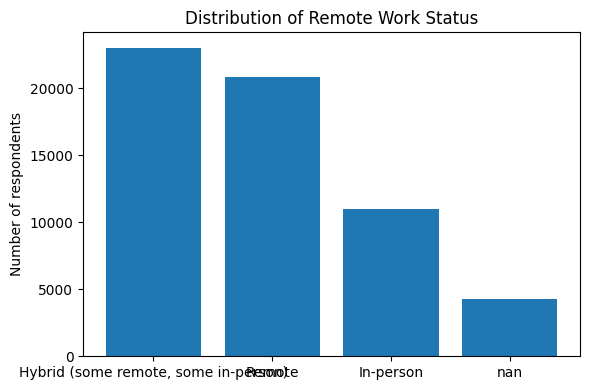

In [18]:
import matplotlib.pyplot as plt

counts = df["RemoteWork"].value_counts(dropna=False)

plt.figure(figsize=(6, 4))
plt.bar(counts.index.astype(str), counts.values)
plt.ylabel("Number of respondents")
plt.title("Distribution of Remote Work Status")
plt.tight_layout()
plt.show()


**Brain drain label distribution**

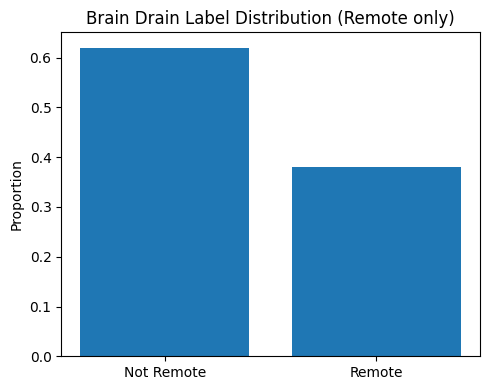

In [19]:
counts = df["brain_drain"].value_counts(normalize=True)

plt.figure(figsize=(5, 4))
plt.bar(["Not Remote", "Remote"], counts.values)
plt.ylabel("Proportion")
plt.title("Brain Drain Label Distribution (Remote only)")
plt.tight_layout()
plt.show()


**Top 20 countries by brain drain rate**

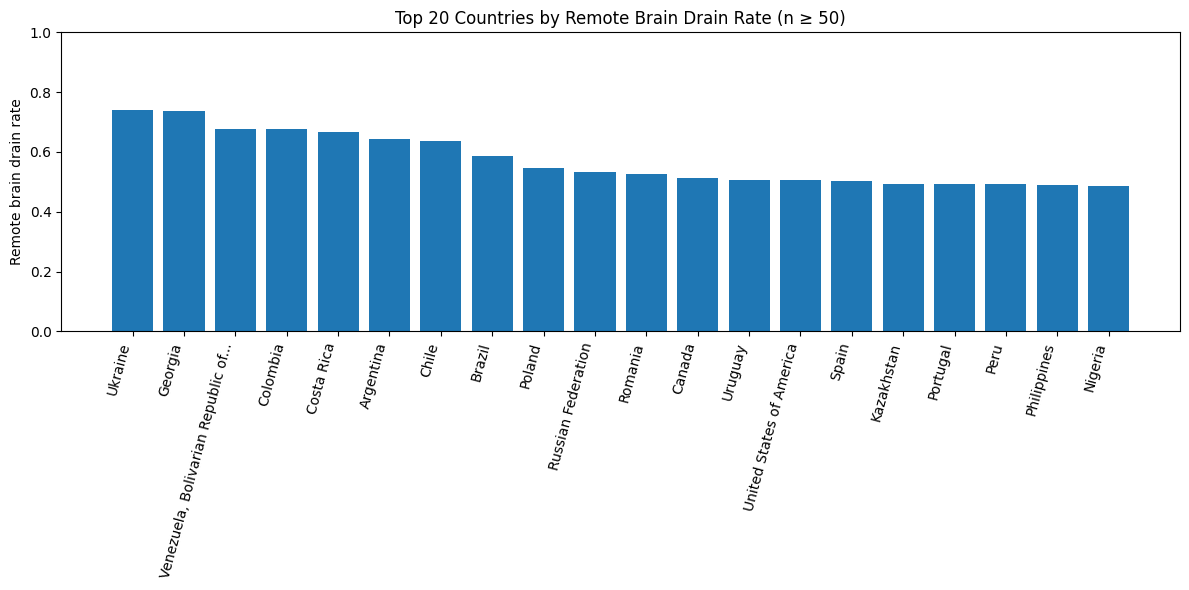

In [20]:
country_stats = (df.groupby("Country")["brain_drain"]
                 .agg(rate="mean", n="count")
                 .reset_index()
                 .query("n >= 50")
                 .sort_values("rate", ascending=False)
                 .head(20))

plt.figure(figsize=(12, 6))
plt.bar(country_stats["Country"], country_stats["rate"])
plt.xticks(rotation=75, ha="right")
plt.ylim(0, 1)
plt.ylabel("Remote brain drain rate")
plt.title("Top 20 Countries by Remote Brain Drain Rate (n ≥ 50)")
plt.tight_layout()
plt.show()


**Brain drain rate by seniority**

C:\Users\DELL\AppData\Local\Temp\ipykernel_9576\2779891554.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sen_stats = (df.groupby("seniority")["brain_drain"]


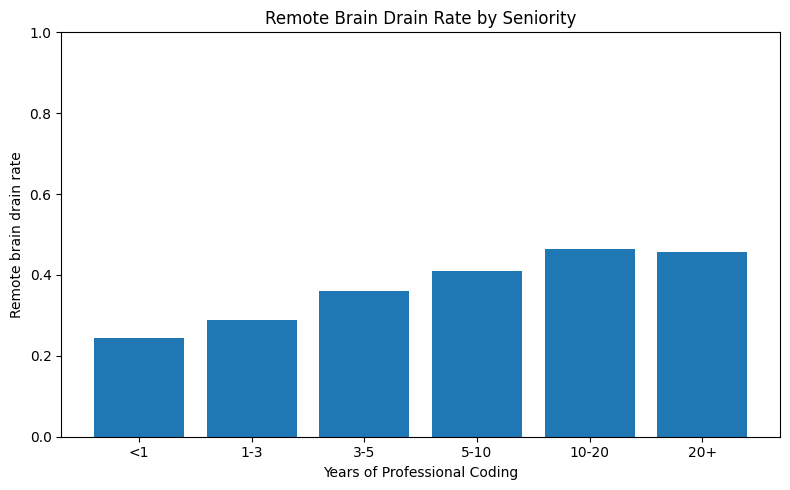

In [21]:
df["seniority"] = pd.cut(
    df["YearsCodePro_num"],
    bins=[-1, 1, 3, 5, 10, 20, 100],
    labels=["<1", "1-3", "3-5", "5-10", "10-20", "20+"]
)

sen_stats = (df.groupby("seniority")["brain_drain"]
             .mean()
             .reset_index())

plt.figure(figsize=(8, 5))
plt.bar(sen_stats["seniority"].astype(str), sen_stats["brain_drain"])
plt.ylim(0, 1)
plt.xlabel("Years of Professional Coding")
plt.ylabel("Remote brain drain rate")
plt.title("Remote Brain Drain Rate by Seniority")
plt.tight_layout()
plt.show()


**Brain drain by education level**

C:\Users\DELL\AppData\Local\Temp\ipykernel_9576\2496366138.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


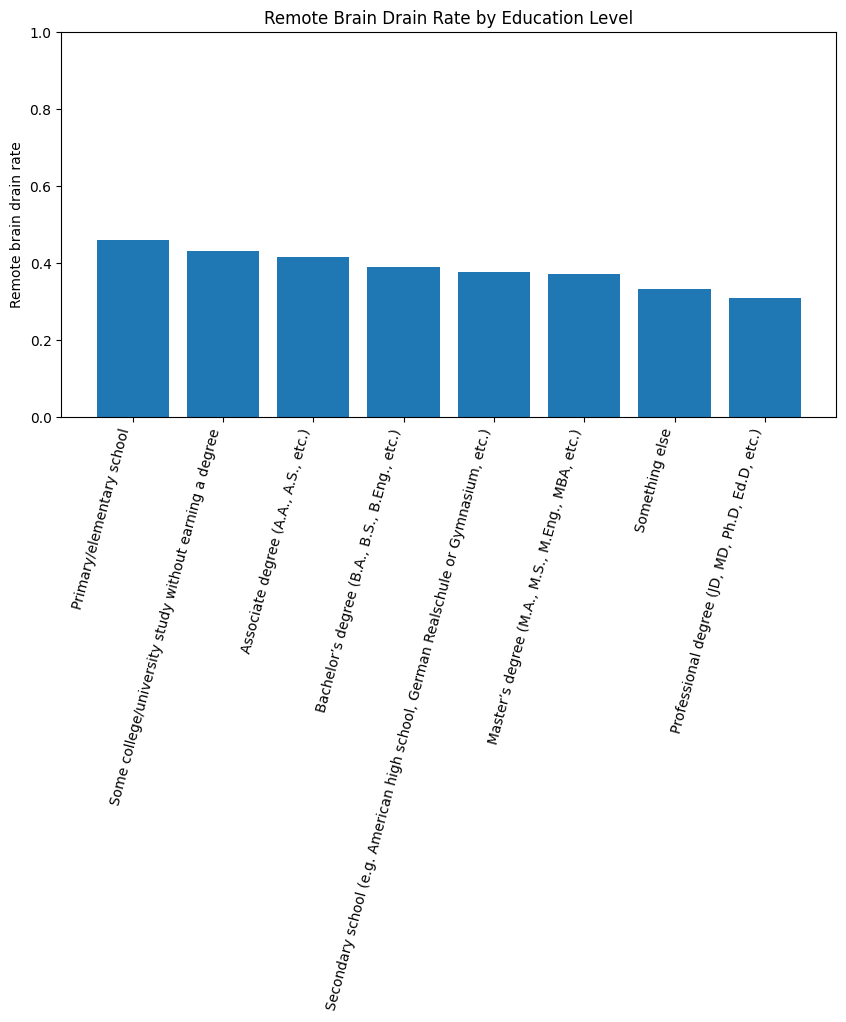

In [22]:
edu_stats = (df.groupby("EdLevel")["brain_drain"]
             .agg(rate="mean", n="count")
             .reset_index()
             .sort_values("rate", ascending=False)
             .head(15))

plt.figure(figsize=(10, 5))
plt.bar(edu_stats["EdLevel"], edu_stats["rate"])
plt.xticks(rotation=75, ha="right")
plt.ylim(0, 1)
plt.ylabel("Remote brain drain rate")
plt.title("Remote Brain Drain Rate by Education Level")
plt.tight_layout()
plt.show()


**Brain drain by developer role**

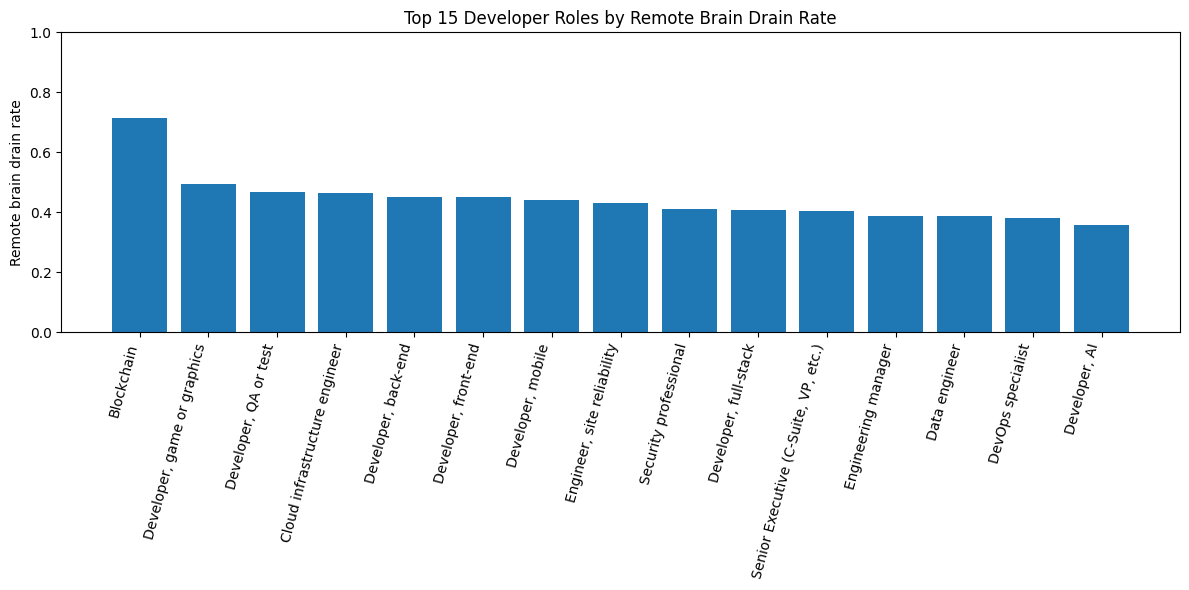

In [23]:
tmp = df[["DevType", "brain_drain"]].dropna(subset=["DevType"]).copy()
tmp["DevType"] = tmp["DevType"].str.split(";")
tmp = tmp.explode("DevType")

dev_stats = (tmp.groupby("DevType")["brain_drain"]
             .agg(rate="mean", n="count")
             .reset_index()
             .query("n >= 200")
             .sort_values("rate", ascending=False)
             .head(15))

plt.figure(figsize=(12, 6))
plt.bar(dev_stats["DevType"], dev_stats["rate"])
plt.xticks(rotation=75, ha="right")
plt.ylim(0, 1)
plt.ylabel("Remote brain drain rate")
plt.title("Top 15 Developer Roles by Remote Brain Drain Rate")
plt.tight_layout()
plt.show()


**Salary comparison: Remote vs Not Remote**

C:\Users\DELL\AppData\Local\Temp\ipykernel_9576\1342493218.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([not_remote, remote], labels=["Not Remote", "Remote"], showfliers=False)


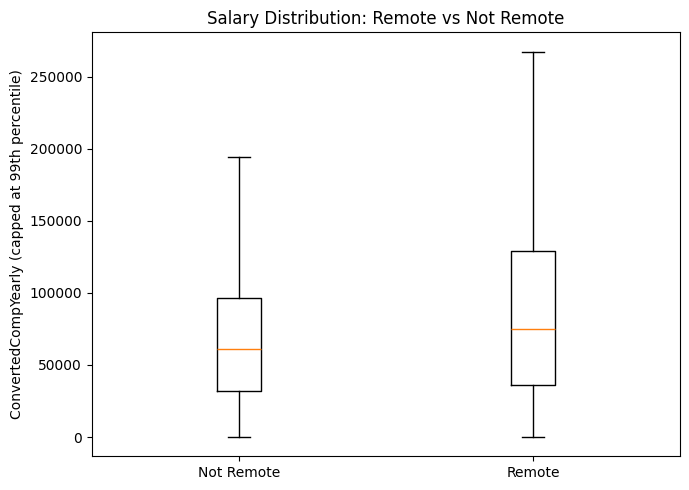

In [24]:
# Cap extreme values for visualization only
cap = df["ConvertedCompYearly"].quantile(0.99)
df["Comp_plot"] = df["ConvertedCompYearly"].clip(upper=cap)

not_remote = df[df["brain_drain"] == 0]["Comp_plot"].dropna()
remote = df[df["brain_drain"] == 1]["Comp_plot"].dropna()

plt.figure(figsize=(7, 5))
plt.boxplot([not_remote, remote], labels=["Not Remote", "Remote"], showfliers=False)
plt.ylabel("ConvertedCompYearly (capped at 99th percentile)")
plt.title("Salary Distribution: Remote vs Not Remote")
plt.tight_layout()
plt.show()


**Country brain drain rate vs salary uplift**

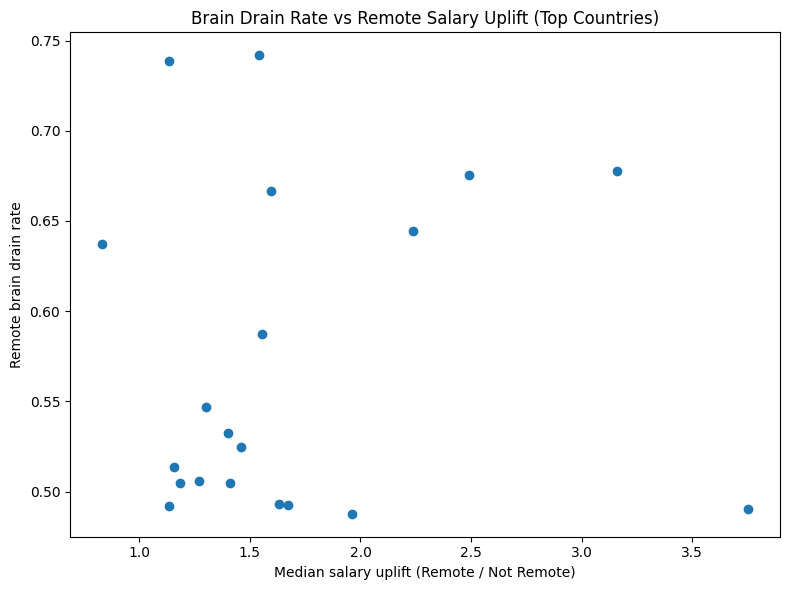

In [25]:
country_pay = (df.groupby(["Country", "brain_drain"])["ConvertedCompYearly"]
               .median()
               .reset_index()
               .pivot(index="Country", columns="brain_drain", values="ConvertedCompYearly")
               .rename(columns={0: "median_not_remote", 1: "median_remote"})
               .reset_index())

country_pay["uplift_ratio"] = country_pay["median_remote"] / country_pay["median_not_remote"]

final_country = country_stats.merge(country_pay, on="Country", how="left").dropna(subset=["uplift_ratio"])

plt.figure(figsize=(8, 6))
plt.scatter(final_country["uplift_ratio"], final_country["rate"])
plt.xlabel("Median salary uplift (Remote / Not Remote)")
plt.ylabel("Remote brain drain rate")
plt.title("Brain Drain Rate vs Remote Salary Uplift (Top Countries)")
plt.tight_layout()
plt.show()
